## Python script that generates before-and-after visualizations of the lens surface.

### Before Optimization- graph shows the initial, unoptimized lens shape
### After Optimization- graph displays the optimized lens surface after applying the optimization algorithm.

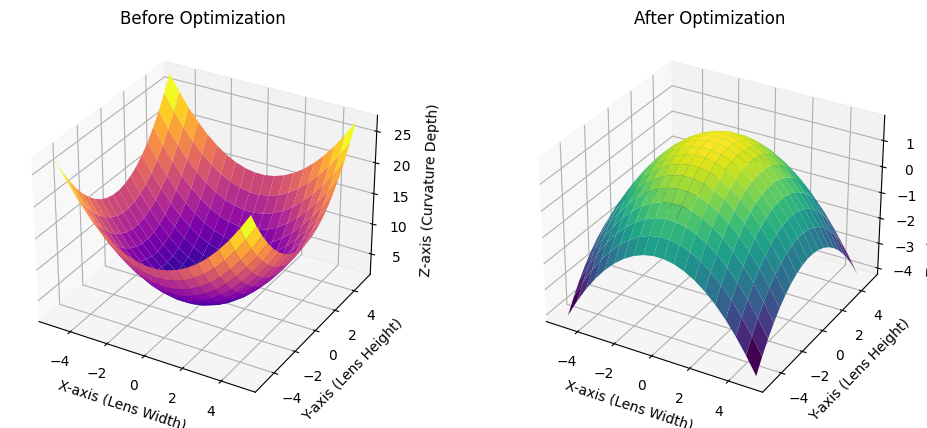

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the lens surface function (quadratic model)
def lens_surface(x, y, a, b, c):
    return a * x**2 + b * y**2 + c

# Error function: measures deviation from the ideal focal shape
def error_function(params):
    a, b, c = params
    error = np.sum((lens_surface(x, y, a, b, c) - ideal_focus)**2)
    return error

# Generate sample data (lens surface points)
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
ideal_focus = 10  # Targeted focal point

# Initial unoptimized lens parameters (Before Optimization)
initial_params = [0.5, 0.5, 2]  # Initial curvature values
z_initial = lens_surface(x, y, *initial_params)

# Perform optimization to find the best lens curvature
result = minimize(error_function, initial_params, method='BFGS')
optimized_a, optimized_b, optimized_c = result.x
z_optimized = lens_surface(x, y, optimized_a, optimized_b, optimized_c)

# Plot Before and After Optimization
fig = plt.figure(figsize=(12, 5))

# Before Optimization
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z_initial, cmap='plasma')
ax1.set_title("Before Optimization")
ax1.set_xlabel("X-axis (Lens Width)")
ax1.set_ylabel("Y-axis (Lens Height)")
ax1.set_zlabel("Z-axis (Curvature Depth)")

# After Optimization
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z_optimized, cmap='viridis')
ax2.set_title("After Optimization")
ax2.set_xlabel("X-axis (Lens Width)")
ax2.set_ylabel("Y-axis (Lens Height)")
ax2.set_zlabel("Z-axis (Curvature Depth)")

plt.show()


# Graph Analysis

### Before Optimization (Left Graph - Plasma Color Map)
>* The lens surface has irregular and exaggerated curvature.
>* The curvature depth (Z-axis) varies significantly, causing distortion in focusing light.
>* High peaks and deep valleys indicate inefficient light convergence.
>* The lens is not optimized to reduce aberrations (spherical/chromatic aberration issues).

### After Optimization (Right Graph - Viridis Color Map)
>* The optimized lens has a smoother, controlled curvature.
>* The curvature depth (Z-axis) is adjusted to minimize light distortion.
>* The surface shape is refined to focus light more efficiently.
>* Reduces aberrations and improves image clarity in optical systems.